## Pandas
ここからとってきた

https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html

In [1]:
import numpy as np
import pandas as pd

## The Pandas Series Object
A Pandas Series is a one-dimensional array of indexed data. It can be created from a list or array as follows:

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

 values and index attributes. The values are simply a familiar NumPy array:

In [4]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

The index is an array-like object of type pd.Index, w

In [5]:
data.index

RangeIndex(start=0, stop=4, step=1)

インデクスによる要素へのアクセス

In [6]:
data[1], data[1:3]

(0.5,
 1    0.50
 2    0.75
 dtype: float64)

辞書からインデクス付きのSeriesをつくることもで作ることもできるきる

In [9]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

## The Pandas DataFrame Object

In [14]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

人口と面積の２つのSeriesをつかって、DataFrameを作ります

In [10]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [11]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [12]:
states.columns

Index(['population', 'area'], dtype='object')

### DataFrame as specialized dictionary

In [13]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

## Data Selection in Series

In [15]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [16]:
data['b']

0.5

In [17]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [18]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [19]:
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [20]:
# slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [21]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

### Indexers: loc, iloc, and ix

In [22]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [23]:
# explicit index when indexing
data[1]

'a'

In [24]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

First, the **loc** attribute allows indexing and slicing that always references the **explicit index**:

In [25]:
data.loc[1]

'a'

In [26]:
data.loc[1:3]

1    a
3    b
dtype: object

The iloc attribute allows indexing and slicing that always references the implicit Python-style index

In [27]:
data.iloc[1]

'b'

In [28]:
data.iloc[1:3]

3    b
5    c
dtype: object

## Data Selection in DataFrame

In [29]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [30]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [31]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [32]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [33]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [34]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [35]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [36]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


### Additional indexing conventions

In [37]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [39]:
data[1:3]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


In [38]:
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


# ここから別の例
https://towardsdatascience.com/data-wrangling-in-pandas-a-downloadable-cheatsheet-84326d255a7b

In [42]:
# Defining DataFrame by specifing a list of observations
df_1= pd.DataFrame([['a', 'b', 'c'],
                 ['d', 'e', 'f'],
                 ['g', 'h', 'i']],
                index = [1,2,3], columns = ['col1', 'col2', 'col3'])
# Defining DataFrame by specifing a dictionary of columns 
df_2= pd.DataFrame({'col1': ['a', 'd', 'g'], 
                 'col2': ['b', 'e', 'h'],
                 'col3': ['c', 'f', 'i']}, 
                 index = [1,2,3])
df_1

,col1,col2,col3
1,a,b,c
2,d,e,f
3,g,h,i


CSVから読む。irisの場合

In [45]:
iris=pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/main/pandas/tests/io/data/csv/iris.csv')
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


loc is a label based function to access data for a particular index and/or column and returns all the entries stored for that particular index/column. iris.loc[[0,1]] will return rows indexed 0 and 1 :

In [46]:
iris.loc[[0,1]]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [48]:
iris.loc[[0,1], ['SepalLength', 'PetalLength']]

,SepalLength,PetalLength
0,5.1,1.4
1,4.9,1.4


iloc is the second option for slicing dataframes. It essentially does the same thing as loc but makes use of integer based positions to access data instead of index and column label

In [49]:
iris.iloc[1:4,0:3]

,SepalLength,SepalWidth,PetalLength
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5


In [69]:
iris.loc[2]

SepalLength            4.7
SepalWidth             3.2
PetalLength            1.3
PetalWidth             0.2
Name           Iris-setosa
Name: 2, dtype: object

In [70]:
iris.iloc[2]

SepalLength            4.7
SepalWidth             3.2
PetalLength            1.3
PetalWidth             0.2
Name           Iris-setosa
Name: 2, dtype: object

### Summarizing Data

In [50]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [52]:
iris['Name'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Name, dtype: int64

## DATA WRANGLING
### Combining DataFrames

In [54]:
df_1 = iris.iloc[[1,51],3:]
df_1

,PetalWidth,Name
1,0.2,Iris-setosa
51,1.5,Iris-versicolor


In [55]:
df_2=iris.iloc[[1,51,101],[0,2,4]]
df_2

,SepalLength,PetalLength,Name
1,4.9,1.4,Iris-setosa
51,6.4,4.5,Iris-versicolor
101,5.8,5.1,Iris-virginica


In [56]:
pd.merge(df_1, df_2, how = 'outer', on= 'Name')

,PetalWidth,Name,SepalLength,PetalLength
0,0.2,Iris-setosa,4.9,1.4
1,1.5,Iris-versicolor,6.4,4.5
2,NaN,Iris-virginica,5.8,5.1


In [58]:
pd.merge(df_1, df_2, how = 'inner', on= 'Name')

,PetalWidth,Name,SepalLength,PetalLength
0,0.2,Iris-setosa,4.9,1.4
1,1.5,Iris-versicolor,6.4,4.5


In [60]:
df_3 = iris.iloc[[1,2,3,4,51,52,53,54],[0,2,4]]
df_3

,SepalLength,PetalLength,Name
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa
51,6.4,4.5,Iris-versicolor
52,6.9,4.9,Iris-versicolor
53,5.5,4.0,Iris-versicolor
54,6.5,4.6,Iris-versicolor


In [63]:
a=df_3.groupby('Name')

In [66]:
a.get_group('Iris-versicolor')

,SepalLength,PetalLength,Name
51,6.4,4.5,Iris-versicolor
52,6.9,4.9,Iris-versicolor
53,5.5,4.0,Iris-versicolor
54,6.5,4.6,Iris-versicolor


## 時系列

In [72]:
nobs=8
ts=pd.date_range('1/1/2000',periods=nobs,freq='M')
ts

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31'],
              dtype='datetime64[ns]', freq='M')

In [77]:
y0=np.random.normal(loc=1.5,scale=2.0, size=nobs)
y= pd.Series(y0,index=ts)
y

2000-01-31    2.001265
2000-02-29    3.767908
2000-03-31    2.747251
2000-04-30    3.415354
2000-05-31    3.702214
2000-06-30   -0.126219
2000-07-31    2.293003
2000-08-31    5.421788
Freq: M, dtype: float64

In [79]:
y['31/3/2000':'31/7/2000']

2000-03-31    2.747251
2000-04-30    3.415354
2000-05-31    3.702214
2000-06-30   -0.126219
2000-07-31    2.293003
Freq: M, dtype: float64

##　時間はここも見るべき
https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

In [3]:
import pandas as pd
import numpy as np
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [4]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

### Resampling, Shifting, and Windowing

In [7]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='google')
goog.head()

NotImplementedError: data_source='google' is not implemented

## なぜかpandas_datareaderのサンプル

https://dev.classmethod.jp/articles/pandas_datareader-python/

より

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import pandas_datareader.data as web

start = dt.date(2019,1,1)
end = dt.date(2020,1,1)

df_ntt = web.DataReader('9432.T',"yahoo",start,end)
df_kddi = web.DataReader('9433.T',"yahoo",start,end)

<AxesSubplot:title={'center':'NTT and KDDI'}, xlabel='Date'>

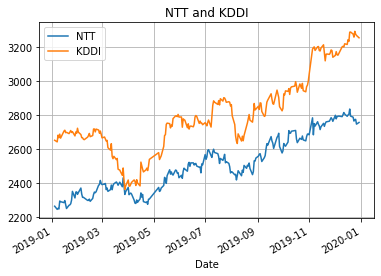

In [2]:
df2=pd.DataFrame({'NTT':df_ntt['Close'],'KDDI':df_kddi['Close']})
df2.plot(title= 'NTT and KDDI', grid=True)

## CS109のpandasも見るべき、
https://github.com/Harvard-IACS/2021-CS109A/blob/master/content/lectures/lecture02/notebook/Lec2_notebook.ipynb